# Machine learning Weather prediction model

In [35]:
import pandas as pd
import matplotlib as mlt
weather = pd.read_csv("syd_weather.csv", index_col="DATE")

In [36]:
weather

,STATION,NAME,MDTX,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,
1980-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.00,68.0,77.0,70.0
1980-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.71,67.0,69.0,64.0
1980-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,1.36,71.0,77.0,65.0
1980-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.53,71.0,83.0,69.0
1980-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.00,71.0,76.0,65.0
...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.00,NaN,NaN,NaN
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.00,NaN,NaN,NaN
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,0.01,NaN,NaN,NaN


# checking which columns contain the most missing values

In [37]:
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]
null_percentage

STATION    0.000000
NAME       0.000000
MDTX       0.999873
PRCP       0.000509
TAVG       0.001909
TMAX       0.000700
TMIN       0.001209
dtype: float64

checking which columns contain a good amount of data


In [38]:
valid_columns = weather.columns[null_percentage < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [39]:
weather = weather[valid_columns].copy()

using forward fill to fill in the missing values (for example data seems to be missing for 2023)

In [40]:
weather = weather.ffill()
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]
null_percentage

STATION    0.0
NAME       0.0
PRCP       0.0
TAVG       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

making sure that columns contain the correct data types

In [41]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
dtype: object

In [42]:
weather.index

Index(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
       '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09', '1980-01-10',
       ...
       '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
       '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
      dtype='object', name='DATE', length=15714)

need to change the date column to a datetime object

In [43]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', name='DATE', length=15714, freq=None)

In [44]:
weather.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=15714)

making sure we dont have gaps in our data (i.e. missing years)

In [45]:
weather.index.year.value_counts().sort_index()

1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023      8
Name: DATE, dtype: int64

<AxesSubplot: xlabel='DATE'>

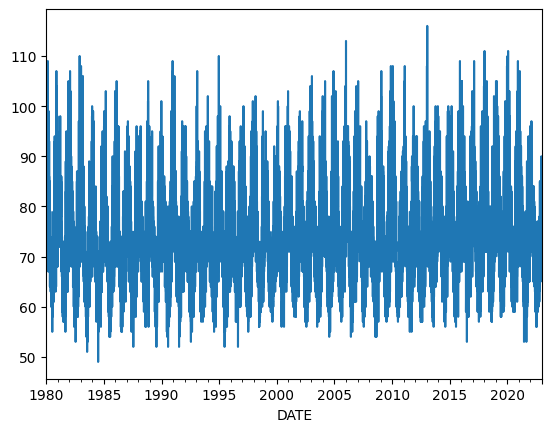

In [46]:
weather["TMAX"].plot()

<AxesSubplot: xlabel='DATE'>

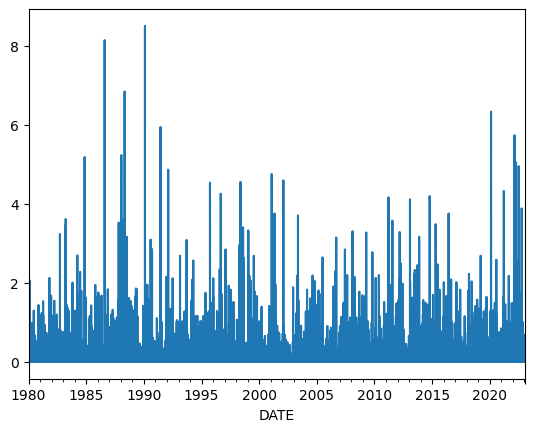

In [47]:
weather["PRCP"].plot()

In [48]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1980-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,68.0,77.0,70.0
1980-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.71,67.0,69.0,64.0
1980-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",1.36,71.0,77.0,65.0
1980-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.53,71.0,83.0,69.0
1980-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,71.0,76.0,65.0
...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.01,73.0,81.0,64.0


to be able to predict into the future we need to shift all the values back by one day so that we can add a new column for our target prediction

In [49]:
weather["target"] = weather.shift(-1)["TMAX"]
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,,,
1980-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,68.0,77.0,70.0,69.0
1980-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.71,67.0,69.0,64.0,77.0
1980-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",1.36,71.0,77.0,65.0,83.0
1980-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.53,71.0,83.0,69.0,76.0
1980-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,71.0,76.0,65.0,78.0
...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0,81.0
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0,81.0
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.01,73.0,81.0,64.0,81.0


In [50]:
weather = weather.ffill()
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,,,
1980-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,68.0,77.0,70.0,69.0
1980-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.71,67.0,69.0,64.0,77.0
1980-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",1.36,71.0,77.0,65.0,83.0
1980-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.53,71.0,83.0,69.0,76.0
1980-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,71.0,76.0,65.0,78.0
...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0,81.0
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,73.0,81.0,64.0,81.0
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.01,73.0,81.0,64.0,81.0


In [52]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)

In [54]:
predictors = weather.columns[~weather.columns.isin(["target", "NAME", "STATION"])]
predictors

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

Time series data --> use back testing or time seres cross validation to account for the time series nature of the data

In [55]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions) 

In [56]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1989-12-29,81.0,77.388780,3.611220
1989-12-30,81.0,79.097381,1.902619
1989-12-31,93.0,81.987152,11.012848
1990-01-01,75.0,79.887404,4.887404
1990-01-02,90.0,77.361620,12.638380
...,...,...,...
2023-01-04,81.0,80.747842,0.252158
2023-01-05,81.0,80.751916,0.248084
2023-01-06,81.0,80.743136,0.256864


using mean absolute error to calculate the error of our model

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.195782687343803